In [208]:
%reset -f

#2022July8 linear regression power formula, KML file added

import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from scipy.optimize import minimize

np.set_printoptions(suppress=True)  #suppress scientific notation numpy
pd.set_option("display.max_columns",None) #show all columns

In [209]:
df_county1=pd.read_csv('gandom_county_filled.csv')

x1=df_county1[['Literatcy1HS2above']].to_numpy().ravel()
x2=df_county1[['ProvinceCode']].to_numpy().ravel()
x3=df_county1[['CountyCode']].to_numpy().ravel()
x4=df_county1[['NumFarms']].to_numpy().ravel()
x5_region=df_county1[['Region']].to_numpy().ravel()
x6_lat=df_county1[['LatitudeDegree']].to_numpy().ravel()
x7_long=df_county1[['LongitudeDegree']].to_numpy().ravel()
x8=df_county1[['source1well2surface']].to_numpy().ravel()
x9=df_county1[['network1traditional2modern']].to_numpy().ravel()
x10_warmcold=df_county1[['Warm0Cold1']].to_numpy().ravel()
x11_drywet=df_county1[['Dry0Semi05Wet1']].to_numpy().ravel()
x12=df_county1[['croparea_ha']].to_numpy().ravel()
x13_ecwat=df_county1[['ECwatirrig_dsm']].to_numpy().ravel()
x14=df_county1[['SoilSalinitydSm']].to_numpy().ravel()
x15=df_county1[['variety1chaI2chamII3Pish4SirMih5Oth']].to_numpy().ravel()
x16_soil=df_county1[['SoilTexture1Light2Normal3Heavy']].to_numpy().ravel()
x17_gd=df_county1[['GrowthLength150200_123']].to_numpy().ravel()
x18=df_county1[['Irrig1surf2sprinkl3drip']].to_numpy().ravel()
x19=df_county1[['irrig_depth_avg']].to_numpy().ravel()
x20_numirrig=df_county1[['number_of_irrig']].to_numpy().ravel()
x21_volirrig=df_county1[['water_vol_m3ha']].to_numpy().ravel()
x22_effrain=df_county1[['effective_rain_fao_currentyear_mm']].to_numpy().ravel()
x23=df_county1[['effective_rain_10year_fao075p_mm']].to_numpy().ravel()
x24=df_county1[['WatNeedNationalBook_mm']].to_numpy().ravel()
x25=df_county1[['WaterNeedBookmm']].to_numpy().ravel()
x26=df_county1[['Et_clim_data_this_year_mm']].to_numpy().ravel()
x27=df_county1[['ET_clim_10year_mm']].to_numpy().ravel()
x28_leech=df_county1[['leeching_need_percent']].to_numpy().ravel()
x29=df_county1[['water_efficiency_kgm3']].to_numpy().ravel()
x30=df_county1[['efficiency_irrig_effectiveraincurrentyear_kgm3']].to_numpy().ravel()
x31=df_county1[['efficiency_irrig_effectiverain10year_kgm3']].to_numpy().ravel()
y=df_county1[['yield_kgha']].to_numpy().ravel()




display(df_county1)

,County,Province,Region,NumFarms,ProvinceCode,CountyCode,Warm0Cold1,Dry0Semi05Wet1,Literatcy1HS2above,LongitudeDegree,LatitudeDegree,source1well2surface,network1traditional2modern,ECwatirrig_dsm,croparea_ha,SoilTexture1Light2Normal3Heavy,SoilSalinitydSm,variety1chaI2chamII3Pish4SirMih5Oth,GrowthLength150200_123,Irrig1surf2sprinkl3drip,irrig_depth_avg,number_of_irrig,water_vol_m3ha,effective_rain_fao_currentyear_mm,effective_rain_10year_fao075p_mm,WatNeedNationalBook_mm,WaterNeedBookmm,Et_clim_data_this_year_mm,ET_clim_10year_mm,leeching_need_percent,yield_kgha,water_efficiency_kgm3,efficiency_irrig_effectiveraincurrentyear_kgm3,efficiency_irrig_effectiverain10year_kgm3
0,ParsabadMoqan,Ardebil,1,6,1,1,1,1,2.0,47.861667,39.563333,1,2,1,16,3,2,4,3.0,1,109,9.0,6107,72,128,283,593,554,487,3,5737,1.01,0.89,0.81
1,Behbahan,Khuzestan,3,31,2,2,0,1,1.0,50.226517,30.588919,1,2,2,8,2,4,4,2.0,2,69,8.0,4090,127,158,514,595,398,450,6,3935,1.00,0.76,0.72
2,Bavi,Khuzestan,3,2,2,3,0,0,1.0,48.891625,31.545014,1,2,2,95,3,3,2,2.0,1,82,6.0,4532,70,112,412,599,398,615,5,3950,0.91,0.79,0.73
3,Ahvaz,Khuzestan,3,2,2,4,0,0,1.0,48.501931,31.176097,1,1,2,65,1,5,2,2.0,1,91,5.0,4563,75,118,412,599,398,626,7,5850,1.30,1.11,1.03
4,Hamidieh,Khuzestan,3,2,2,5,0,0,2.0,48.459403,31.419514,1,2,1,134,2,3,4,2.0,1,108,5.0,5415,73,120,412,599,398,608,4,4600,0.86,0.75,0.70
5,DashtAzadegan,Khuzestan,3,6,2,6,0,0,1.0,48.368796,31.497583,1,1,2,28,2,6,2,2.0,1,119,5.0,5605,75,121,322,593,398,664,4,4467,0.80,0.71,0.66
6,Shush,Khuzestan,3,10,2,7,0,0,1.0,48.198197,32.243513,1,2,1,15,2,3,4,1.0,1,103,8.0,5724,107,144,322,592,427,414,4,5000,0.97,0.78,0.74
7,Kharkheh,Khuzestan,3,2,2,8,0,0,1.0,48.399980,31.947903,2,2,2,18,2,3,2,1.0,2,140,8.0,7328,123,170,322,592,370,370,5,3546,0.49,0.41,0.39
8,Jovain,KhorasanRazavi,2,6,3,9,1,1,2.0,57.354564,36.678036,2,2,1,15,2,2,4,3.0,2,669,8.0,5352,113,129,635,618,709,775,2,4300,0.82,0.68,0.66
9,Neishabur,KhorasanRazavi,2,12,3,10,1,0,1.0,58.645417,36.321667,2,1,2,30,2,3,3,3.0,1,75,7.0,4697,207,169,569,612,708,629,7,4675,1.10,0.71,0.76


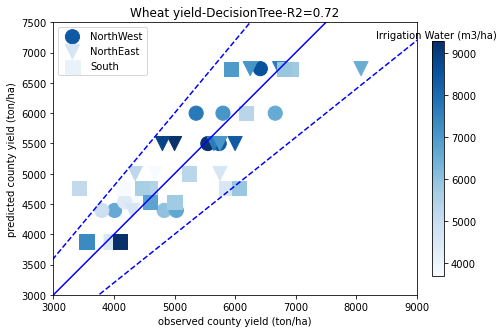

In [210]:
x=np.c_[x6_lat,x7_long]
x=np.c_[x10_warmcold,x11_drywet,x13_ecwat,x16_soil,x17_gd,x20_numirrig,x21_volirrig,x22_effrain,x28_leech]


xmin=np.min(x,axis=0)
xmax=np.max(x,axis=0)
ymin=np.min(y)
ymax=np.max(y)
X=(x-xmin)/(xmax-xmin)
Y=(y-ymin)/(ymax-ymin)

regressor_lin1 = LinearRegression()
regressor_lin1=DecisionTreeRegressor(max_depth=5,min_samples_leaf=4)
#regressor_lin1 = MLPRegressor(hidden_layer_sizes=10,max_iter=500000, activation='tanh')
regressor_lin1.fit(X,Y)
#regressor_lin1.fit(X,X)
Y_hat_lin1 = regressor_lin1.predict(X)

y_hat_lin1=Y_hat_lin1*(ymax-ymin)+ymin

fig = plt.figure()
ax = fig.add_subplot(111)
fig.set_size_inches(7, 7)
#ax.scatter(y, y_hat_lin1, color = 'red')
marker_=['o','v','s']
m=ax.scatter(y[x5_region==1], y_hat_lin1[x5_region==1], marker='o',c=x21_volirrig[x5_region==1],cmap='Blues',s=200,label='NorthWest')
m=ax.scatter(y[x5_region==2], y_hat_lin1[x5_region==2], marker='v',c=x21_volirrig[x5_region==2],cmap='Blues',s=200,label='NorthEast')
m=ax.scatter(y[x5_region==3], y_hat_lin1[x5_region==3], marker='s',c=x21_volirrig[x5_region==3],cmap='Blues',s=200,label='South')
cbar=fig.colorbar(m,fraction=0.03, pad=0.04)
cbar.set_label('Irrigation Water (m3/ha)', rotation=0,labelpad=-40, y=1.05,)
ax.plot(np.array([0,10000]),np.array([0,10000]), 'b-')
ax.plot(np.array([10000,0,10000]),np.array([12000,0,8000]), 'b--')
ax.legend()
ax.set_xlabel('observed county yield (ton/ha)')
ax.set_ylabel('predicted county yield (ton/ha)')
ax.set_xlim(left=3000,right=9000)
ax.set_ylim(bottom=3000,top=7500)
ax.set_aspect('equal')
ax.set_title("Wheat yield-DecisionTree-R2="+str(np.round(r2_score(y,y_hat_lin1),3)))
fig.savefig('county_yield_wheat_decision_tree.png', dpi=300)

In [211]:
max(x21_volirrig)

9270

[0.927 0.    0.    0.    0.179 0.264 0.    0.262 0.102 0.   ]


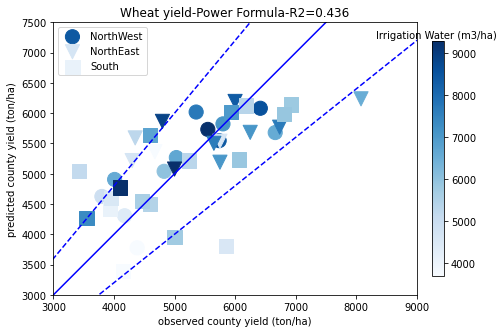

In [212]:
# parameters:
#     x10_warmcold
#     x11_drywet
#     x13_ecwat
#     x16_soil
#     x17_gd
#     x20_numirrig
#     x21_volirrig
#     x22_effrain
#     x28_leech


N=41
x0=np.zeros((N,1)).ravel()
x=np.c_[x0,x10_warmcold,x11_drywet,x13_ecwat,x16_soil,x17_gd,x20_numirrig,x21_volirrig,x22_effrain,x28_leech,x5_region]


a0 = [0.821, #intercept
      0.05, #warmcold
      -0.046, #drywet
      -0.034, #ecwat
      0.179, #soil_texture
      0.193, #gd
      -0.064, #numirrig
     0.252, #volirrig
     0.091, #effrain
     -0.055] #leech

#           x1          x2       x3       x4            x5       x6         x7       x8        x9
# intercept warmcold   drywet    ecwat   soil_texture  gd        numirrig   volirrig effrain   leech
a0=[0.821,  0.05     ,-0.046,   -0.034,  0.179,        0.193,   -0.064,    0.252    ,0.091,   -0.055]
a0=[0.927 , 0.00,    0.000,    0.000  ,0.179 ,        0.264,     0.000  ,  0.262 ,   0.102 ,  0.000]

def func1(a,x): 
    x1=(x[:,1]+0.5)/1.5 #warmcold
    x2=(x[:,2]+0.5)/1.5 #drywet
    x3=(x[:,3]+0.5)/8 #ecwat
    x4=x[:,4]/3 #soiltexture
    x5=x[:,5]/3 #gdays
    x6=x[:,6]/12 #numirrig
    x7=x[:,7]/10000 #volirrig
    x8=x[:,8]/350 #effrain
    x9=1+x[:,9]/100 #leech
    
    #temp=8000*a[0]*x1**(a[1]*0)*x2**(a[2]*0)*x3**(a[3]*0)*x4**a[4]*x5**a[5]*x6**(a[6]*0)*x7**a[7]*x8**(a[8])*x9**(a[9]*0)
    temp=8000*a[0]*x4**a[4]*x5**a[5]*x7**a[7]*x8**(a[8])
    return temp

func2= lambda a: np.dot(y-func1(a,x),y-func1(a,x))/2500
res = minimize(func2,a0)
a0=np.round(res.x,3)
print(a0)
y_hat_lin1=func1(a0,x)

fig = plt.figure()
ax = fig.add_subplot(111)
fig.set_size_inches(7, 7)
#ax.scatter(y, y_hat_lin1, color = 'red')
marker_=['o','v','s']
m=ax.scatter(y[x5_region==1], y_hat_lin1[x5_region==1], marker='o',c=x21_volirrig[x5_region==1],cmap='Blues',s=200,label='NorthWest')
m=ax.scatter(y[x5_region==2], y_hat_lin1[x5_region==2], marker='v',c=x21_volirrig[x5_region==2],cmap='Blues',s=200,label='NorthEast')
m=ax.scatter(y[x5_region==3], y_hat_lin1[x5_region==3], marker='s',c=x21_volirrig[x5_region==3],cmap='Blues',s=200,label='South')
cbar=fig.colorbar(m,fraction=0.03, pad=0.04)
cbar.set_label('Irrigation Water (m3/ha)', rotation=0,labelpad=-40, y=1.05,)
ax.plot(np.array([0,10000]),np.array([0,10000]), 'b-')
ax.plot(np.array([10000,0,10000]),np.array([12000,0,8000]), 'b--')
ax.legend()
ax.set_xlabel('observed county yield (ton/ha)')
ax.set_ylabel('predicted county yield (ton/ha)')
ax.set_xlim(left=3000,right=9000)
ax.set_ylim(bottom=3000,top=7500)
ax.set_aspect('equal')
ax.set_title("Wheat yield-Power Formula-R2="+str(np.round(r2_score(y,y_hat_lin1),3)))
fig.savefig('county_yield_wheat_power_formula.png', dpi=300)

$\frac{Yield}{8000 kg/ha} = 
0.821       
\times {(\frac{x_{Warm=0, Cold=1}+0.5}{1.5})}^{0.05} 
\times {(\frac{x_{dry=0, wet=1}+0.5}{1.5})}^{-0.046}
\times {(\frac{ECwat+0.5}{8 dS/m})}        ^{-0.034}
\times {(\frac{soil_{1=light,3=heavy}}{3})} ^{0.179}
\times {(\frac{x=1_{day<150},x=3_{day>200}}{3})} ^{0.193} 
\times {(\frac{{events}_{irrigation}}{12 times})}  ^{-0.064}
\times {(\frac{Irrig_{Wat}}{10000 m^3/ha})}     ^{0.252} 
\times {(\frac{Rain_{effective}}{350 mm})}     ^{0.091}
\times {(1+\frac{leech_{percent}}{100})}     ^{-0.055}$



In [213]:
a0 = [0.821, #intercept
      0.05, #warmcold
      -0.046, #drywet
      -0.034, #ecwat
      0.179, #soil_texture
      0.193, #gd
      -0.064, #numirrig
     0.252, #volirrig
     0.091, #effrain
     -0.055,] #leech

[ 1.992  0.101  3.532  0.46  -1.116  2.906  1.516  0.149  0.161 -2.315
  0.358 -6.852 -2.612 -0.162 -0.225  0.264  5.299 -0.5    0.251 -2.023
  0.496 -4.744  0.797  0.096 -0.166  0.337  0.911  0.18   0.133  0.312]


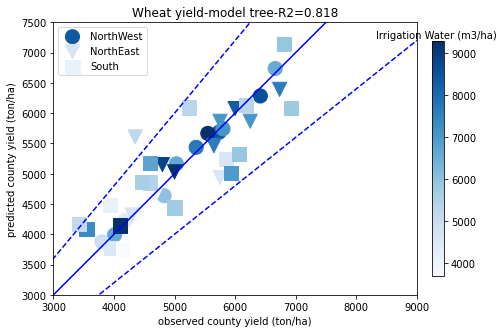

In [214]:
# parameters:
#     x10_warmcold
#     x11_drywet
#     x13_ecwat
#     x16_soil
#     x17_gd
#     x20_numirrig
#     x21_volirrig
#     x22_effrain
#     x28_leech


N=41
x0=np.zeros((N,1)).ravel()
x=np.c_[x0,x10_warmcold,x11_drywet,x13_ecwat,x16_soil,x17_gd,x20_numirrig,x21_volirrig,x22_effrain,x28_leech,x5_region]



#           x1          x2       x3       x4            x5       x6         x7       x8        x9
# intercept warmcold   drywet    ecwat   soil_texture  gd        numirrig   volirrig effrain   leech
a0=[0.857,  0.       , 0.        , 0.   , 0.652       ,1.038 ,0.   , 0.111 ,0.094, 0.,
    1.127 , 0.       ,  0        ,  0.  ,   0.367     , 0.264 , 0.  ,   0.499 , 0.129 , 0.,
    0.808,  0.       ,    0.      , 0.  ,  -0.024,    0.385,  0.  ,   0.02 ,  0.123,  0. ]



def func1(a,x): 

    x3=(x[:,3]+0.5)/8 #ecwat
    x4=x[:,4]/3 #soiltexture
    x5=x[:,5]/3 #gdays
    x6=x[:,6]/12 #numirrig
    x7=x[:,7]/10000 #volirrig
    x8=x[:,8]/350 #effrain
    x9=1+x[:,9]/100 #leech
    x10=x5_region
    
    #power function
    j=0
    temp0=8000*a[j+0]*x3**a[j+3]*x4**a[j+4]*x5**a[j+5]*x7**(a[j+6]+a[j+1]*x7+a[j+2]*x3+a[j+9]*x4)*x6**a[j+7]*x8**a[j+8]
    j=10
    temp1=8000*a[j+0]*x3**a[j+3]*x4**a[j+4]*x5**a[j+5]*x7**(a[j+6]+a[j+1]*x7+a[j+2]*x3+a[j+9]*x4)*x6**a[j+7]*x8**a[j+8]
    j=20
    temp2=8000*a[j+0]*x3**a[j+3]*x4**a[j+4]*x5**a[j+5]*x7**(a[j+6]+a[j+1]*x7+a[j+2]*x3+a[j+9]*x4)*x6**a[j+7]*x8**a[j+8]

    #linear function
    #j=0
    #temp0=8000*a[j+0]+a[j+3]*x3+x4*a[j+4]+x5*a[j+5]+x6*a[j+6]+x7*a[j+7]+x8*a[j+8]+a[j+2]*np.sqrt(x6)
    #j=10
    #temp1=8000*a[j+0]+a[j+3]*x3+x4*a[j+4]+x5*a[j+5]+x6*a[j+6]+x7*a[j+7]+x8*a[j+8]+a[j+2]*np.sqrt(x6)
    #j=20
    #temp2=8000*a[j+0]+a[j+3]*x3+x4*a[j+4]+x5*a[j+5]+x6*a[j+6]+x7*a[j+7]+x8*a[j+8]+a[j+2]*np.sqrt(x6)    
    
    
    temp=x4*0
    temp[x10==1]=temp0[x10==1]
    temp[x10==2]=temp1[x10==2]
    temp[x10==3]=temp2[x10==3]
    
    return temp

func2= lambda a: np.dot(y-func1(a,x),y-func1(a,x))/2500
res = minimize(func2,a0)
a0=np.round(res.x,3)
print(a0)
y_hat_lin1=func1(a0,x)

fig = plt.figure()
ax = fig.add_subplot(111)
fig.set_size_inches(7, 7)
#ax.scatter(y, y_hat_lin1, color = 'red')
marker_=['o','v','s']
m=ax.scatter(y[x5_region==1], y_hat_lin1[x5_region==1], marker='o',c=x21_volirrig[x5_region==1],cmap='Blues',s=200,label='NorthWest')
m=ax.scatter(y[x5_region==2], y_hat_lin1[x5_region==2], marker='v',c=x21_volirrig[x5_region==2],cmap='Blues',s=200,label='NorthEast')
m=ax.scatter(y[x5_region==3], y_hat_lin1[x5_region==3], marker='s',c=x21_volirrig[x5_region==3],cmap='Blues',s=200,label='South')
cbar=fig.colorbar(m,fraction=0.03, pad=0.04)
cbar.set_label('Irrigation Water (m3/ha)', rotation=0,labelpad=-40, y=1.05,)
ax.plot(np.array([0,10000]),np.array([0,10000]), 'b-')
ax.plot(np.array([10000,0,10000]),np.array([12000,0,8000]), 'b--')
ax.legend()
ax.set_xlabel('observed county yield (ton/ha)')
ax.set_ylabel('predicted county yield (ton/ha)')
ax.set_xlim(left=3000,right=9000)
ax.set_ylim(bottom=3000,top=7500)
ax.set_aspect('equal')
ax.set_title("Wheat yield-model tree-R2="+str(np.round(r2_score(y,y_hat_lin1),3)))
fig.savefig('county_yield_wheat_modeltree.png', dpi=300)

[     0.619     -4.86       0.062      0.523      3.044      4.971
    -14.95       1.604     11.935     -1.674    104.581    -28.809
     -8.246    -41.938    -46.082    126.433    -19.694    -98.935
     -0.454     26.877    -17.056     -7.081     -7.82      -5.695
     19.625     -4.773    -21.753 -15075.507      0.         0.02
      0.123      0.         0.   ]


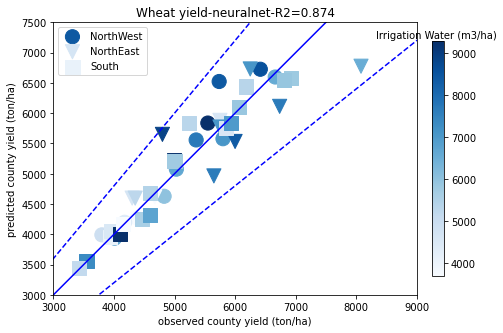

In [221]:
# parameters:
#     x10_warmcold
#     x11_drywet
#     x13_ecwat
#     x16_soil
#     x17_gd
#     x20_numirrig
#     x21_volirrig
#     x22_effrain
#     x28_leech


N=41
x0=np.zeros((N,1)).ravel()
x=np.c_[x0,x10_warmcold,x11_drywet,x13_ecwat,x16_soil,x17_gd,x20_numirrig,x21_volirrig,x22_effrain,x28_leech,x5_region]



#           x1          x2       x3       x4            x5       x6         x7       x8        x9
# intercept             warmcold   drywet    ecwat   soil_texture  gd        numirrig   volirrig effrain   leech
a0=[0.857,      0.       , 0.        , 0.   , 0.652       ,1.038 ,0.   , 0.111 ,0.094, 0., 0,
    1.127 ,   0.       ,  0        ,  0.  ,   0.367     , 0.264 , 0.  ,   0.499 , 0.129 , 0.,0,
    0.808,      0.       ,    0.      , 0.  ,  -0.024,    0.385,  0.  ,   0.02 ,  0.123,  0. ,0]



def func1(a,x): 

    x3=(x[:,3]+0.5)/8 #ecwat
    x4=x[:,4]/3 #soiltexture
    x5=x[:,5]/3 #gdays
    x6=x[:,6]/12 #numirrig
    x7=x[:,7]/10000 #volirrig
    x8=x[:,8]/350 #effrain
    x9=1+x[:,9]/100 #leech
    x10=x5_region
    

    #linear function
    j=0
    temp0=np.abs(8000*a[j+0]*np.tanh(a[j+1]+a[j+2]*x3+x4*a[j+3]+x5*a[j+4]+x6*a[j+5]+x7*a[j+6]+x8*a[j+7]+a[j+8]*np.sqrt(x7)))
    j=9
    temp1=np.abs(8000*a[j+0]*np.tanh(a[j+1]+a[j+2]*x3+x4*a[j+3]+x5*a[j+4]+x6*a[j+5]+x7*a[j+6]+x8*a[j+7]+a[j+8]*np.sqrt(x7)))
    j=18
    temp2=np.abs(8000*a[j+0]*np.tanh(a[j+1]+a[j+2]*x3+x4*a[j+3]+x5*a[j+4]+x6*a[j+5]+x7*a[j+6]+x8*a[j+7]+a[j+8]*np.sqrt(x7)))
    
    temp=temp0+temp1+temp2+a[27]
    
    return temp

func2= lambda a: np.dot(y-func1(a,x),y-func1(a,x))/2500
res = minimize(func2,a0)
a0=np.round(res.x,3)
print(a0)
y_hat_lin1=func1(a0,x)

fig = plt.figure()
ax = fig.add_subplot(111)
fig.set_size_inches(7, 7)
#ax.scatter(y, y_hat_lin1, color = 'red')
marker_=['o','v','s']
m=ax.scatter(y[x5_region==1], y_hat_lin1[x5_region==1], marker='o',c=x21_volirrig[x5_region==1],cmap='Blues',s=200,label='NorthWest')
m=ax.scatter(y[x5_region==2], y_hat_lin1[x5_region==2], marker='v',c=x21_volirrig[x5_region==2],cmap='Blues',s=200,label='NorthEast')
m=ax.scatter(y[x5_region==3], y_hat_lin1[x5_region==3], marker='s',c=x21_volirrig[x5_region==3],cmap='Blues',s=200,label='South')
cbar=fig.colorbar(m,fraction=0.03, pad=0.04)
cbar.set_label('Irrigation Water (m3/ha)', rotation=0,labelpad=-40, y=1.05,)
ax.plot(np.array([0,10000]),np.array([0,10000]), 'b-')
ax.plot(np.array([10000,0,10000]),np.array([12000,0,8000]), 'b--')
ax.legend()
ax.set_xlabel('observed county yield (ton/ha)')
ax.set_ylabel('predicted county yield (ton/ha)')
ax.set_xlim(left=3000,right=9000)
ax.set_ylim(bottom=3000,top=7500)
ax.set_aspect('equal')
ax.set_title("Wheat yield-neuralnet-R2="+str(np.round(r2_score(y,y_hat_lin1),3)))
fig.savefig('county_yield_wheat_neuralnet.png', dpi=300)